In [3]:
import pandas as pd

# Path to the CSV file
csv_path = r"C:\Users\gerva\OneDrive\Documentos\LONDON SCHOOL OF ECONOMICS\ST498 CAPSTONE PROJECT\7591elec_1489be66b1659070840e4ac791bc2997\7591elec\csv\edrp_elec.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
print(df.head())


   ANON_ID   ADVANCEDATETIME  HH  ELECKWH
0     5110  15FEB08:12:30:00  25     0.60
1    11617  15FEB08:12:30:00  25     0.25
2     4869  15FEB08:12:30:00  25     0.30
3     9015  15FEB08:12:30:00  25     0.40
4    11628  15FEB08:12:30:00  25     0.85


In [5]:
# Filter the DataFrame for ANON_ID 123
df_123 = df[df['ANON_ID'] == 123]

# Select the ELECKWH and ADVANCEDATETIME columns
df_123_selected = df_123[['ADVANCEDATETIME', 'ELECKWH']]

# Display the first few rows of the filtered DataFrame
print(df_123_selected.head())


            ADVANCEDATETIME  ELECKWH
217098304  11SEP09:11:30:00     0.14
217111809  11SEP09:12:00:00     0.18
217124202  11SEP09:12:30:00     0.24
217137707  11SEP09:13:00:00     0.22
217150093  11SEP09:13:30:00     0.25


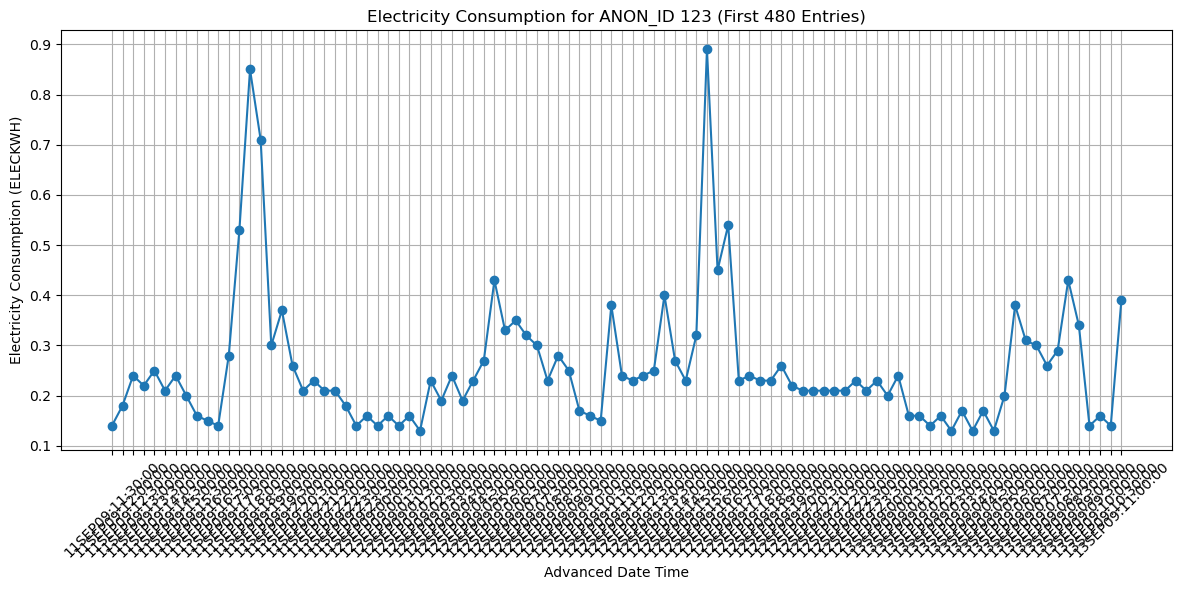

In [23]:
import matplotlib.pyplot as plt

# Take the first 480 entries
df_123_selected_limited = df_123_selected.head(96)

# Plot ELECKWH vs ADVANCEDATETIME for the first 480 entries
plt.figure(figsize=(12, 6))
plt.plot(df_123_selected_limited['ADVANCEDATETIME'], df_123_selected_limited['ELECKWH'], marker='o')
plt.xlabel('Advanced Date Time')
plt.ylabel('Electricity Consumption (ELECKWH)')
plt.title('Electricity Consumption for ANON_ID 123 (First 96 Entries)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjusts plot to prevent clipping of labels
plt.show()



In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure ADVANCEDATETIME is in datetime format
df['ADVANCEDATETIME'] = pd.to_datetime(df['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')

# Extract the year from ADVANCEDATETIME
df['Year'] = df['ADVANCEDATETIME'].dt.year

# Group by Year and HH, then calculate the average ELECKWH
df_avg_by_year_hh = df.groupby(['Year', 'HH'])['ELECKWH'].mean().reset_index()

# Plot the average ELECKWH for each year
plt.figure(figsize=(14, 8))

# Get unique years for plotting
years = sorted(df_avg_by_year_hh['Year'].unique())

# Plot each year's data
for year in years:
    year_data = df_avg_by_year_hh[df_avg_by_year_hh['Year'] == year]
    plt.plot(year_data['HH'], year_data['ELECKWH'], marker='o', label=f'Year {year}')

# Customize the plot
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average Electricity Consumption (ELECKWH)')
plt.title('Average Electricity Consumption by Half Hour for Each Year')
plt.xticks(range(1, 49))  # HH values range from 1 to 48
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()



MemoryError: Unable to allocate 3.08 GiB for an array with shape (413836038,) and data type int64

Plot for all ANONIDS the KWH throughout the day by month.

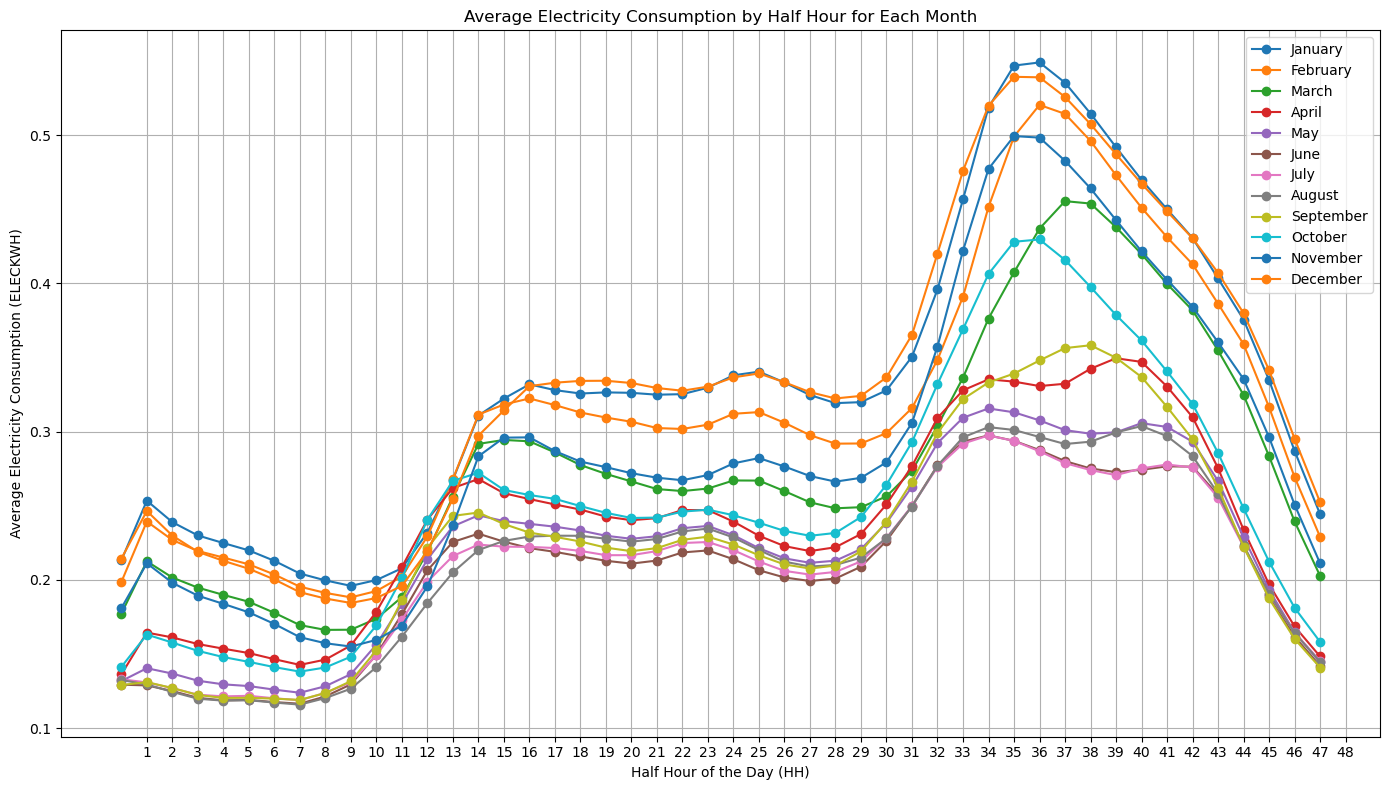

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure ADVANCEDATETIME is in datetime format with the correct format
df['ADVANCEDATETIME'] = pd.to_datetime(df['ADVANCEDATETIME'], format='%d%b%y:%H:%M:%S')

# Extract the month from ADVANCEDATETIME and create a new column for it
df['Month'] = df['ADVANCEDATETIME'].dt.month

# Group by Month and HH, then calculate the average ELECKWH
df_avg_by_month_hh = df.groupby(['Month', 'HH'])['ELECKWH'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(14, 8))

# Define a list of month names for labeling
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Plot each month
for month in range(1, 13):
    month_data = df_avg_by_month_hh[df_avg_by_month_hh['Month'] == month]
    plt.plot(month_data['HH'], month_data['ELECKWH'], marker='o', label=month_names[month - 1])

# Customize the plot
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average Electricity Consumption (ELECKWH)')
plt.title('Average Electricity Consumption by Half Hour for Each Month')
plt.xticks(range(1, 49))  # HH values range from 1 to 48
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


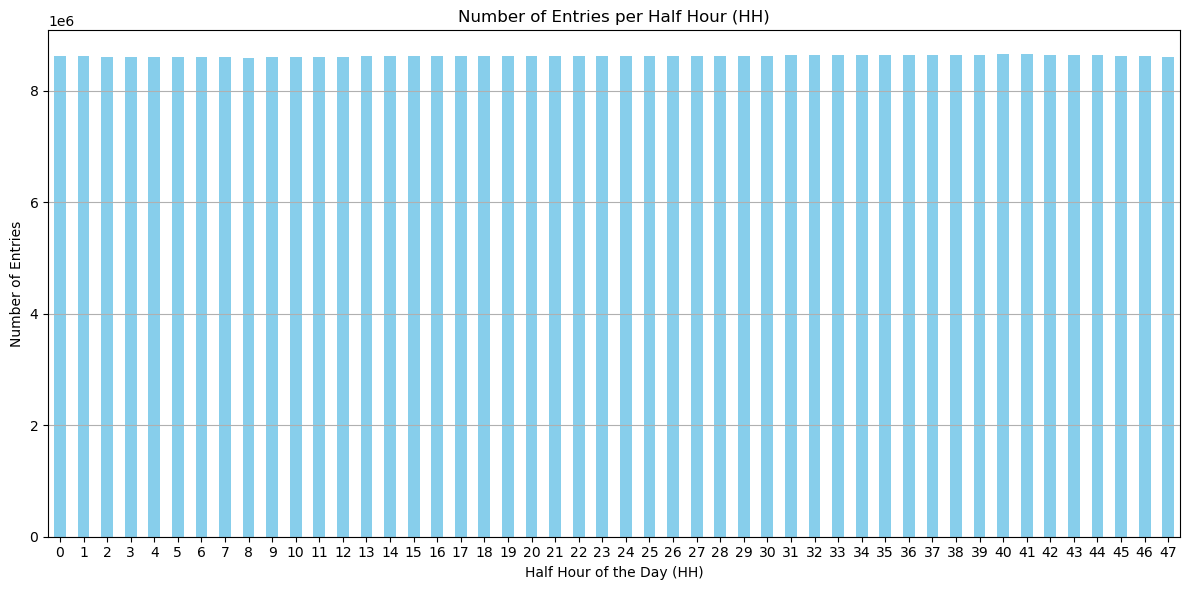

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Count the number of entries per HH
hh_counts = df['HH'].value_counts().sort_index()

# Plot a column chart
plt.figure(figsize=(12, 6))
hh_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Number of Entries')
plt.title('Number of Entries per Half Hour (HH)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

'''
No need to plot this. It just verifies that there are 8 x 1e6 entries for every HH.
'''


Create a reduced dataframe with less ANONIDS for computational capacity.
Plot the average KWH per season throughout the day.

In [50]:
import dask.dataframe as dd
import pandas as pd

# Filter for ANON_IDs 1 to 100 to create df100
df100 = df[df['ANON_ID'].between(1, 100)]

# Define a function to assign seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 2 #'Winter'
    elif month in [3, 4, 5]:
        return 3 # 'Spring'
    elif month in [6, 7, 8]:
        return 0 # Summer
    else:
        return 1 # 'Fall'

# CALL DF100 AND DROP OUTLIER DATES
df100['Month'] = df100['ADVANCEDATETIME'].dt.month
df100['Day'] = df100['ADVANCEDATETIME'].dt.day

condition = ~(
    ((df100['Month'] == 12) & (df100['Day'] >= 23)) |  # 23 Dec to 31 Dec
    ((df100['Month'] == 1) & (df100['Day'] <= 2))     # 1 Jan to 2 Jan
)
df100 = df100[condition]
df100 = df100.drop(columns=['Month', 'Day'])
df100 = df100.persist()



# Create a 'Month' column and assign seasons
df100['Month'] = df100['ADVANCEDATETIME'].dt.month
df100['Season'] = df100['Month'].apply(get_season)

# Group by ANON_ID and Season, and calculate the average ELECKWH
df100_avg_season = df100.groupby(['ANON_ID', 'Season'])['ELECKWH'].mean().compute().reset_index()


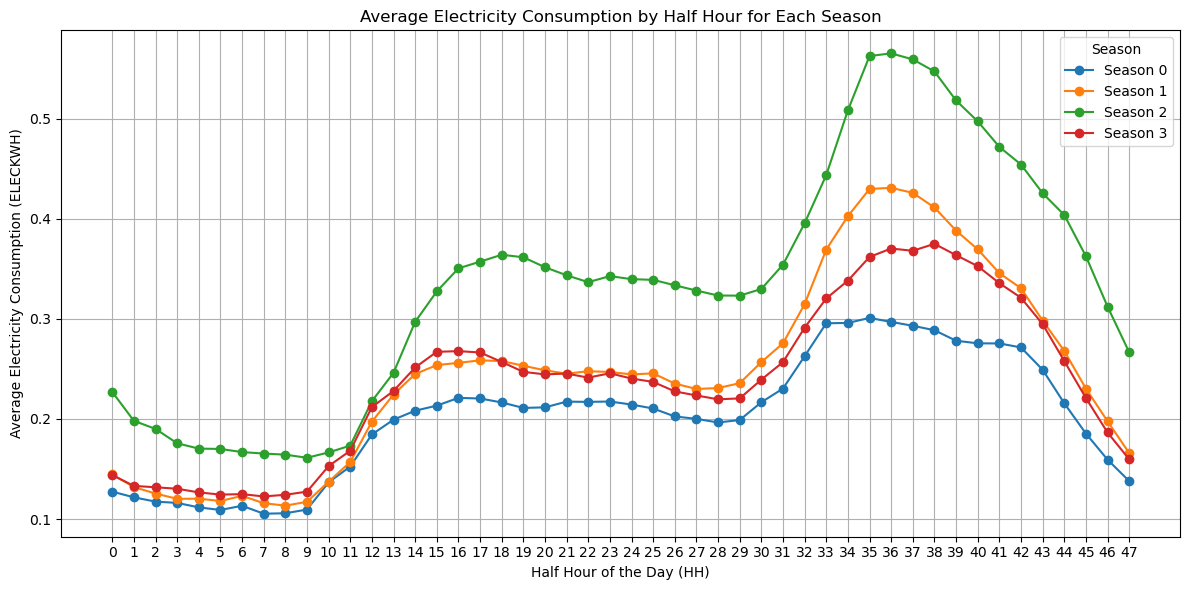

In [51]:
# Plotting
plt.figure(figsize=(12, 6))
df100_avg_hh_season = df100_avg_hh_season.sort_values(by='HH').reset_index(drop=True)
seasons = [0, 1, 2, 3]
for season in seasons:
    season_data = df100_avg_hh_season[df100_avg_hh_season['Season'] == season]
    plt.plot(season_data['HH'], season_data['ELECKWH'], marker='o', label=f'Season {season}')

# Customize the plot
plt.xlabel('Half Hour of the Day (HH)')
plt.ylabel('Average Electricity Consumption (ELECKWH)')
plt.title('Average Electricity Consumption by Half Hour for Each Season')
plt.xticks(range(0, 48))  # HH values range from 0 to 47
plt.grid(True)
plt.legend(title='Season')
plt.tight_layout()

# Show the plot
plt.show()


# Define a function that splits the day in 4 periods #
Split in 4 periods, calculate the mean accordingly per season. 

In [54]:
import dask.dataframe as dd
import pandas as pd

# Create a 'Month' column and assign seasons
df100['Month'] = df100['ADVANCEDATETIME'].dt.month
df100['Season'] = df100['Month'].apply(get_season, meta=('Season', 'int'))

# Define a function to assign HH to specific groups
def hh_group(hh):
    if 12 <= hh <= 20:
        return 'bre'
    elif 21 <= hh <= 32:
        return 'day'
    elif 33 <= hh <= 44:
        return 'eve'
    else:
        return 'nig'

# Create a new column 'HH_Group' for the HH ranges
df100['HH_Group'] = df100['HH'].apply(hh_group, meta=('HH_Group', 'str'))

# Group by ANON_ID, Season, and HH_Group, and calculate the average ELECKWH
df_100_means = df100.groupby(['ANON_ID', 'Season', 'HH_Group'])['ELECKWH'].mean().compute().reset_index()

# Display the result
print(df_100_means)


      ANON_ID  Season HH_Group   ELECKWH
0          15       2      eve  0.653414
1          51       2      day  0.333747
2          63       2      nig  0.079961
3          73       2      day  0.264461
4          91       2      nig  0.384013
...       ...     ...      ...       ...
1367       51       1      eve  0.566087
1368       84       1      nig  0.255806
1369       94       1      nig  0.247052
1370       17       0      day  0.124649
1371        9       1      bre  0.181448

[1372 rows x 4 columns]


In [47]:
import dask.dataframe as dd
import pandas as pd

# Filter for ANON_IDs 1 to 100 to create df100
df100 = df[df['ANON_ID'].between(1, 100)]
df100 = df100.persist()

# Create a 'Month' column and assign seasons
df100['Month'] = df100['ADVANCEDATETIME'].dt.month
df100['Season'] = df100['Month'].apply(get_season, meta=('Season', 'int'))

# Add a 'Weekend' column (1 if weekend, 0 if weekday)
df100['Weekend'] = df100['ADVANCEDATETIME'].dt.weekday.isin([5, 6]).astype(int)

# Define a function to assign HH to specific groups
def hh_group(hh):
    if 12 <= hh <= 20:
        return 'bre'  # Morning to Early Afternoon
    elif 21 <= hh <= 32:
        return 'day'  # Afternoon
    elif 33 <= hh <= 44:
        return 'eve'  # Evening
    else:
        return 'nig'  # Night

# Create a new column 'HH_Group' for the HH ranges
df100['HH_Group'] = df100['HH'].apply(hh_group, meta=('HH_Group', 'str'))

# Group by ANON_ID, Season, HH_Group, and Weekend, and calculate the average ELECKWH
df_100_means = df100.groupby(['ANON_ID', 'Season', 'HH_Group', 'Weekend'])['ELECKWH'].mean().compute().reset_index()

# Rename the 'ELECKWH' column to 'KWH_by_SeasonTimeWknd'
df_100_means = df_100_means.rename(columns={'ELECKWH': 'KWH_by_SeasonTimeWknd'})

# Display the result
print(df_100_means.head())


   ANON_ID  Season HH_Group  Weekend  KWH_by_SeasonTimeWknd
0       23       1      bre        0               0.144556
1       50       1      bre        1               0.159368
2       67       1      bre        0               0.433077
3       92       1      nig        0               0.166005
4       94       1      nig        1               0.237973


Compute Relative Means by HH_GROUP (bre,day,eve,nig)

In [59]:
import pandas as pd

# Group by ANON_ID and HH_Group to compute the mean ELECKWH for each group
mean_by_group = df100.groupby(['ANON_ID', 'HH_Group'])['ELECKWH'].mean().compute().reset_index()

# Compute the overall mean ELECKWH for each ANON_ID
mean_overall = df100.groupby('ANON_ID')['ELECKWH'].mean().compute().reset_index()
mean_overall = mean_overall.rename(columns={'ELECKWH': 'Overall_Mean'})

# Merge the grouped mean with the overall mean
merged = mean_by_group.merge(mean_overall, on='ANON_ID')

# Calculate the Relative Mean Electricity (RME)
merged['RME'] = merged['ELECKWH'] / merged['Overall_Mean']

# Pivot the table to have RME_bre, RME_day, RME_eve, RME_nig as columns
df_rme = merged.pivot(index='ANON_ID', columns='HH_Group', values='RME').reset_index()

# Rename the columns for clarity
df_rme = df_rme.rename(columns={
    'bre': 'RME_bre',
    'day': 'RME_day',
    'eve': 'RME_eve',
    'nig': 'RME_nig'
})

# Fill any missing values with 0 (if any HH_Group is missing for an ANON_ID)
df_rme = df_rme.fillna(0)

# Display the final table
print(df_rme)



HH_Group  ANON_ID   RME_bre   RME_day   RME_eve   RME_nig
0               1  0.981868  0.897870  1.358141  0.805807
1               2  0.705145  1.264745  1.586761  0.493501
2               3  1.005540  0.998142  1.317186  0.745889
3               4  1.250062  1.148012  1.194314  0.579089
4               5  1.571309  1.011771  1.303720  0.403923
..            ...       ...       ...       ...       ...
81             95  0.822379  1.106366  1.628695  0.518501
82             96  0.619737  1.279181  1.534116  0.576189
83             98  0.673088  1.169216  1.366878  0.766720
84             99  1.113921  1.067745  1.449197  0.517787
85            100  1.348871  0.794058  1.555669  0.510896

[86 rows x 5 columns]


Compute the SD

In [61]:
import pandas as pd

# Group by ANON_ID and HH_Group to compute mean and standard deviation for ELECKWH
stats_by_group = df100.groupby(['ANON_ID', 'HH_Group'])['ELECKWH'].agg(['mean', 'std']).compute().reset_index()

# Rename columns for clarity
stats_by_group = stats_by_group.rename(columns={'mean': 'ELECKWH_mean', 'std': 'ELECKWH_std'})

# Calculate the Relative Standard Deviation (RSD) for each group
stats_by_group['RSD'] = (stats_by_group['ELECKWH_std'] / stats_by_group['ELECKWH_mean']) * 100

# Pivot the table to have RSD_bre, RSD_day, RSD_eve, RSD_nig as columns
df_rsd = stats_by_group.pivot(index='ANON_ID', columns='HH_Group', values='RSD').reset_index()

# Rename the columns for clarity
df_rsd = df_rsd.rename(columns={
    'bre': 'RSD_bre',
    'day': 'RSD_day',
    'eve': 'RSD_eve',
    'nig': 'RSD_nig'
})

# Fill missing values (if any) with 0
df_rsd = df_rsd.fillna(0)

# Add a column for the average RSD across all HH_Groups
df_rsd['RSD_avg'] = df_rsd[['RSD_bre', 'RSD_day', 'RSD_eve', 'RSD_nig']].mean(axis=1)

# Display the final table
print(df_rsd.head())


HH_Group  ANON_ID     RSD_bre     RSD_day     RSD_eve     RSD_nig     RSD_avg
0               1   87.986274  113.526394   99.580433   94.314349   98.851863
1               2  185.338208  163.541333  136.828158  163.926450  162.408537
2               3   52.492472   49.067157   55.827543   47.007658   51.098708
3               4   81.941867   82.216071   66.228427   66.202854   74.147305
4               5  130.670632   82.029691   65.662207   57.366687   83.932304
